<a href="https://colab.research.google.com/github/nugi1209/ANZ_Data_Virtual_Experience/blob/main/ANZ_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_excel('https://github.com/nugi1209/ANZ_Data_Virtual_Experience/blob/main/dataset.xlsx?raw=true')

df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [4]:
len(df)

12043

In [5]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [6]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
df['extraction'] = pd.to_datetime(df['extraction'])
df['extraction_date'] = df['extraction'].dt.date
df['extraction_month_name'] = df['extraction'].dt.month_name()
df['extraction_year'] = df['extraction'].dt.year
df['extraction_day_name'] = df['extraction'].dt.day_name()
df['extraction_hour'] = df['extraction'].dt.hour
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08-01,August,2018,Wednesday,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,1


In [8]:
df.loc[df['merchant_id'].isnull()]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00+00:00,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit,2018-08-01,August,2018,Wednesday,2
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00+00:00,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit,2018-08-01,August,2018,Wednesday,6
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,4348.50,2018-08-01,M,19,NaN,NaN,2018-08-01 06:00:00+00:00,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit,2018-08-01,August,2018,Wednesday,6
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,1203.75,2018-08-01,F,43,NaN,NaN,2018-08-01 06:00:00+00:00,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit,2018-08-01,August,2018,Wednesday,6
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01 07:00:00+00:00,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit,2018-08-01,August,2018,Wednesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,NaN,Luis,13537.75,2018-10-31,M,27,NaN,NaN,2018-10-31 21:00:00+00:00,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit,2018-10-31,October,2018,Wednesday,21
12032,posted,NaN,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,NaN,Michelle,20699.90,2018-10-31,F,19,NaN,NaN,2018-10-31 22:00:00+00:00,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit,2018-10-31,October,2018,Wednesday,22
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,9349.51,2018-10-31,M,26,NaN,NaN,2018-10-31 23:00:00+00:00,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit,2018-10-31,October,2018,Wednesday,23
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,18127.50,2018-10-31,M,39,NaN,NaN,2018-10-31 23:00:00+00:00,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit,2018-10-31,October,2018,Wednesday,23


In [9]:
df['status'].unique()

array(['authorized', 'posted'], dtype=object)

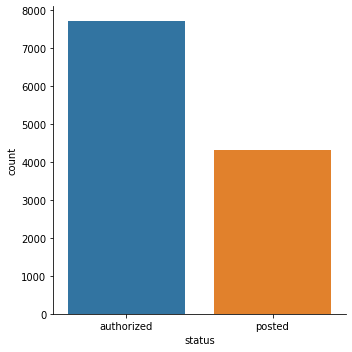

In [10]:
sns.catplot(data=df, x='status', kind='count')

In [11]:
df['card_present_flag'].unique()

array([ 1.,  0., nan])

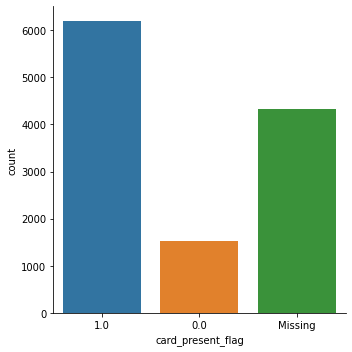

In [12]:
df_card_present_1 = df[['card_present_flag']].copy().fillna("Missing")
sns.catplot(data=df_card_present_1, x='card_present_flag', kind='count')

In [13]:
df['bpay_biller_code'].unique()

array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

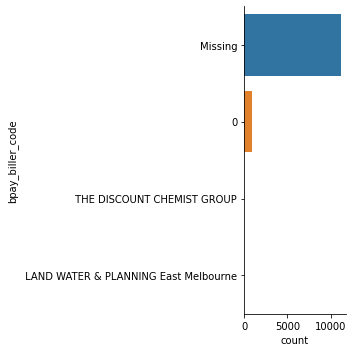

In [14]:
df_bpay_biller_1 = df[['bpay_biller_code']].copy().fillna("Missing")
sns.catplot(data=df_bpay_biller_1, y='bpay_biller_code', kind='count')

In [15]:
df['account'].nunique()

100

In [16]:
df_account_values = df['account'].value_counts()
df_account_values = df_account_values.reset_index()
df_account_values.columns = ['account', 'values_count']
df_account_values.head()


,account,values_count
0,ACC-1598451071,578
1,ACC-1222300524,303
2,ACC-182446574,292
3,ACC-4258502723,260
4,ACC-1037050564,259


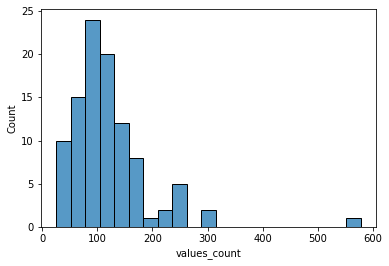

In [17]:
sns.histplot(data=df_account_values, x='values_count')

In [18]:
df['currency'].unique()

array(['AUD'], dtype=object)

In [19]:
df['long_lat'].nunique()

100

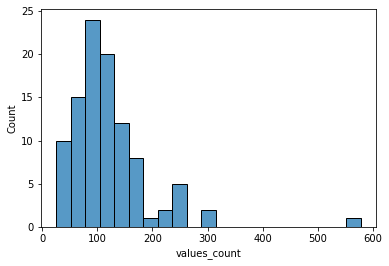

In [20]:
df_long_lat_values = df['long_lat'].value_counts()
df_long_lat_values = df_long_lat_values.reset_index()
df_long_lat_values.columns = ['long_lat', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_long_lat_values, x='values_count')


In [21]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

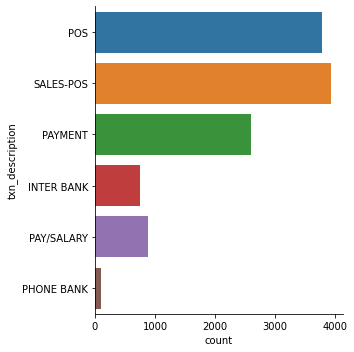

In [22]:
sns.catplot(data=df, y='txn_description', kind='count')

In [23]:
df['merchant_id'].nunique()

5725

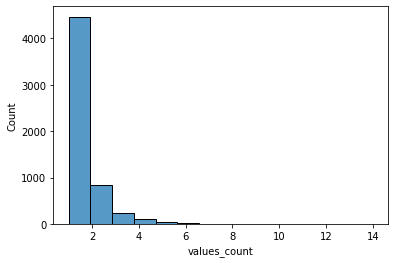

In [24]:
df_merch_id_values = df['merchant_id'].value_counts()
df_merch_id_values = df_merch_id_values.reset_index()
df_merch_id_values.columns = ['long_lat', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merch_id_values, x='values_count')

In [25]:
df['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
18d056a5-a6ac-4435-a130-2a2cc5114f30     1
12cd51f7-6cfb-487d-8c67-1c55a3ca3e39     1
39617a7b-8f44-4987-b25d-e2b41db845b7     1
168766cc-de85-4110-a46a-4bebab0aa5c6     1
d0adbe7b-aa59-45b0-bdb5-73e49ef5ea2c     1
Name: merchant_id, Length: 5725, dtype: int64

In [26]:
df['merchant_code'].unique()

array([nan,  0.])

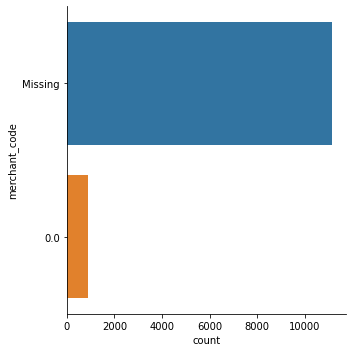

In [27]:
df_merch_code = df[['merchant_code']].copy().fillna("Missing")
sns.catplot(data=df_merch_code, y='merchant_code', kind='count')

In [28]:
df['first_name'].nunique()

80

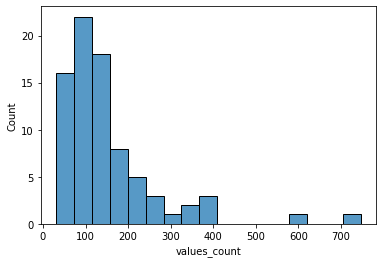

In [29]:
df_fname_values = df['first_name'].value_counts()
df_fname_values = df_fname_values.reset_index()
df_fname_values.columns = ['first_name', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_fname_values, x='values_count')

In [30]:
df['balance'].nunique()

12006

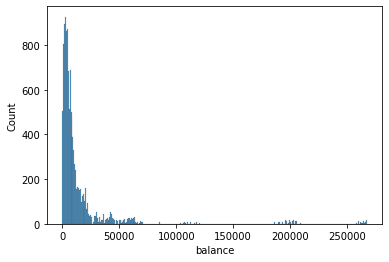

In [31]:
sns.histplot(data=df, x='balance')

In [32]:
df['balance'].nlargest(10)

10467    267128.52
10620    267093.66
10637    267050.66
10709    267028.97
10715    266981.30
10987    266916.32
11003    266894.32
11013    266877.26
11123    266754.88
11247    266704.88
Name: balance, dtype: float64

In [33]:
df['date'].nunique()

91

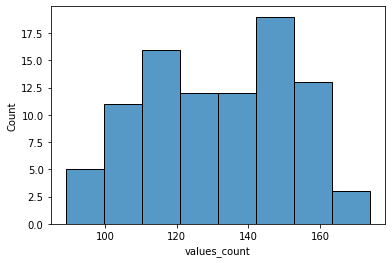

In [34]:
df_date_values = df['date'].value_counts()
df_date_values = df_date_values.reset_index()
df_date_values.columns = ['date', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_date_values, x='values_count')

In [35]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

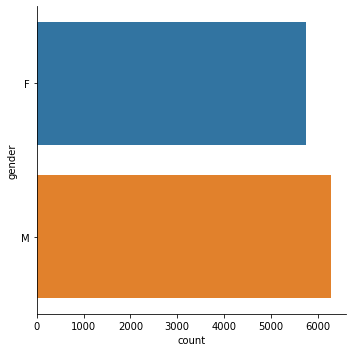

In [36]:
sns.catplot(data=df, y='gender', kind='count')

In [37]:
df['age'].nunique()

33

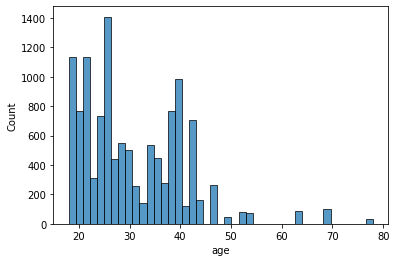

In [38]:
sns.histplot(data=df, x='age')

In [39]:
df['merchant_suburb'].nunique()

1609

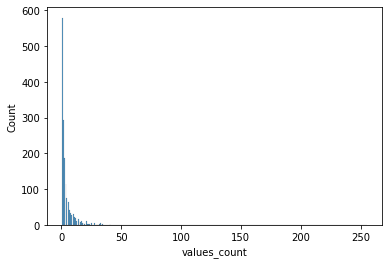

In [40]:
df_merchant_suburb_values = df['merchant_suburb'].value_counts()
df_merchant_suburb_values = df_merchant_suburb_values.reset_index()
df_merchant_suburb_values.columns = ['merchant_suburb', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merchant_suburb_values, x='values_count')


In [41]:
df_merchant_suburb_values.max()

merchant_suburb    Zuccoli
values_count           255
dtype: object

In [42]:
df['merchant_state'].unique()

array(['QLD', 'NSW', nan, 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'],
      dtype=object)

In [43]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

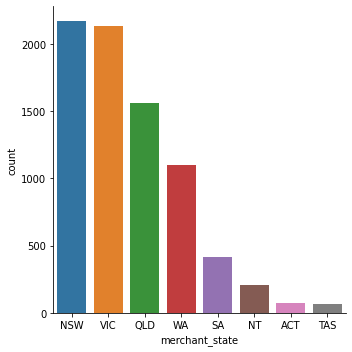

In [44]:
sns.catplot(data=df, x='merchant_state', kind='count', order=df['merchant_state'].value_counts().index)

In [45]:
df['extraction'].nunique()

9442

In [46]:
df['extraction_year'].value_counts()

2018    12043
Name: extraction_year, dtype: int64

In [47]:
df['extraction_month_name'].value_counts()
# sns.catplot(data=df, y='extraction_month_name', kind='count')

October      4087
September    4013
August       3943
Name: extraction_month_name, dtype: int64

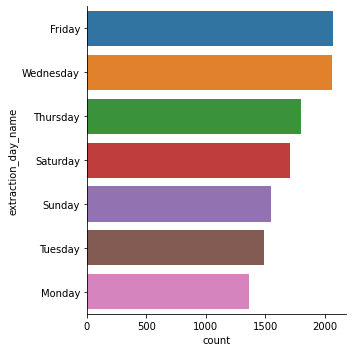

In [48]:
# df['extraction_day_name'].value_counts()
sns.catplot(data=df, y='extraction_day_name', kind='count', order=df['extraction_day_name'].value_counts().index)

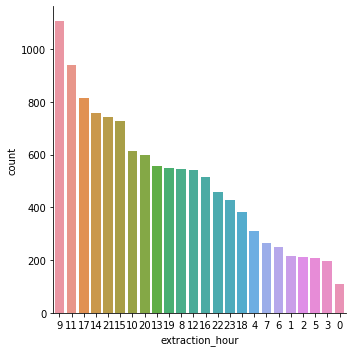

In [49]:
sns.catplot(data=df, x='extraction_hour', kind='count', order=df['extraction_hour'].value_counts().index)

In [50]:
df['amount'].nunique()

4457

In [51]:
df.loc[df['movement']=='debit'].head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08-01,August,2018,Wednesday,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,1


In [52]:
df.loc[df['movement']=='debit']['amount'].mean()

52.57234318996403

In [53]:
df.loc[df['movement']=='debit']['amount'].median()

26.93

In [54]:
df.loc[df['movement']=='debit']['amount'].max()

7081.09

In [55]:
df.loc[df['movement']=='debit']['amount'].min()

0.1

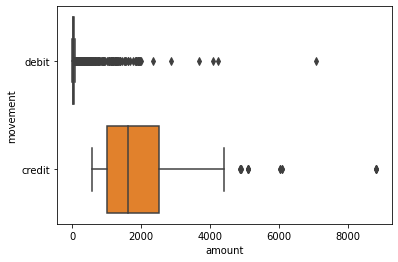

In [56]:
sns.boxplot(data=df, x='amount', y='movement')

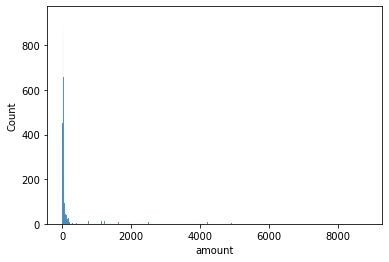

In [57]:
sns.histplot(data=df, x='amount')

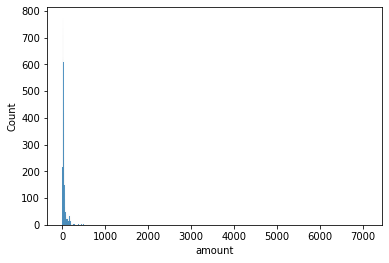

In [58]:
sns.histplot(data=df.loc[df['movement']=='debit'], x='amount')

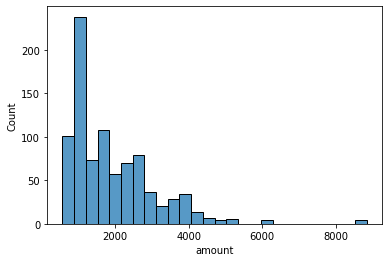

In [59]:
sns.histplot(data=df.loc[df['movement']=='credit'], x='amount')

In [60]:
df.loc[df['movement']=='credit']['amount'].mean()

1898.7280294450716

In [61]:
df.loc[df['movement']=='credit']['amount'].median()

1626.48

In [62]:
df.loc[df['movement']=='credit']['amount'].min()

576.0

In [63]:
df.loc[df['movement']=='credit']['amount'].max()

8835.98

In [64]:
df_amount_values = df['amount'].value_counts().reset_index()
df_amount_values.columns = ['amount', 'frequency']
df_amount_values[df_amount_values['amount'].isin(df_amount_values['amount'].nlargest(10))].sort_values(by='amount', ascending=False)

,amount,frequency
578,8835.98,4
2719,7081.09,1
1514,6107.23,2
1912,6024.49,2
401,5103.51,5
1821,4910.90,2
1271,4863.62,2
180,4405.30,7
2884,4233.00,1
146,4216.04,7


In [65]:
df[df['amount'].isin(df['amount'].nlargest(10))]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour
833,posted,NaN,0,ACC-2673069055,AUD,152.99 -27.49,PAY/SALARY,NaN,0.0,Richard,17127.02,2018-08-07,M,24,NaN,NaN,2018-08-07 15:00:00+00:00,6024.49,b2fedeaf02a6485ba4cf3be69b56a80b,Australia,CUS-51506836,NaN,credit,2018-08-07,August,2018,Tuesday,15
1858,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,8754.76,2018-08-15,F,39,NaN,NaN,2018-08-15 15:00:00+00:00,5103.51,41ce67e6c8a4474385fd1646963b6758,Australia,CUS-2376382098,NaN,credit,2018-08-15,August,2018,Wednesday,15
2401,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,62647.22,2018-08-20,M,40,NaN,NaN,2018-08-20 13:00:00+00:00,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,NaN,credit,2018-08-20,August,2018,Monday,13
4822,posted,NaN,0,ACC-2673069055,AUD,152.99 -27.49,PAY/SALARY,NaN,0.0,Richard,21158.28,2018-09-07,M,24,NaN,NaN,2018-09-07 15:00:00+00:00,6024.49,2a20583ac7ce4bffa46624de2f94d5af,Australia,CUS-51506836,NaN,credit,2018-09-07,September,2018,Friday,15
5754,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,10891.05,2018-09-14,F,39,NaN,NaN,2018-09-14 15:00:00+00:00,5103.51,188e04b6e00f44f3a43afbf232a6f5c3,Australia,CUS-2376382098,NaN,credit,2018-09-14,September,2018,Friday,15
5755,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,15994.56,2018-09-14,F,39,NaN,NaN,2018-09-14 15:00:00+00:00,5103.51,7faf986ac5a341e3adfdb7030ec03f48,Australia,CUS-2376382098,NaN,credit,2018-09-14,September,2018,Friday,15
6529,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,70242.78,2018-09-20,M,40,NaN,NaN,2018-09-20 13:00:00+00:00,8835.98,854ded55d0034ac8b9e91e16334768ca,Australia,CUS-1816693151,NaN,credit,2018-09-20,September,2018,Thursday,13
7322,posted,NaN,0,ACC-3100725361,AUD,145.73 -17.03,PAY/SALARY,NaN,0.0,Ronald,6111.57,2018-09-26,M,25,NaN,NaN,2018-09-26 15:00:00+00:00,6107.23,7eb1fdb7aefb40d1a8ada1d27f556542,Australia,CUS-2178051368,NaN,credit,2018-09-26,September,2018,Wednesday,15
9902,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,19032.03,2018-10-15,F,39,NaN,NaN,2018-10-15 15:00:00+00:00,5103.51,dfff2531d8434969b7f385d364772534,Australia,CUS-2376382098,NaN,credit,2018-10-15,October,2018,Monday,15
9903,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,24135.54,2018-10-15,F,39,NaN,NaN,2018-10-15 15:00:00+00:00,5103.51,e4e7f0dd7c504c45990277dad7a8a86c,Australia,CUS-2376382098,NaN,credit,2018-10-15,October,2018,Monday,15


In [66]:
df['transaction_id'].nunique()

12043

In [67]:
df['country'].unique()

array(['Australia'], dtype=object)

In [68]:
df['customer_id'].nunique()

100

In [69]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

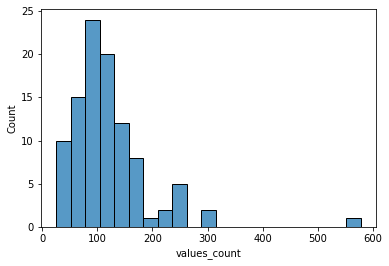

In [70]:
df_customer_id_values = df['customer_id'].value_counts()
df_customer_id_values = df_customer_id_values.reset_index()
df_customer_id_values.columns = ['customer_id', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_customer_id_values, x='values_count')


In [71]:
df['merchant_long_lat'].nunique()

2703

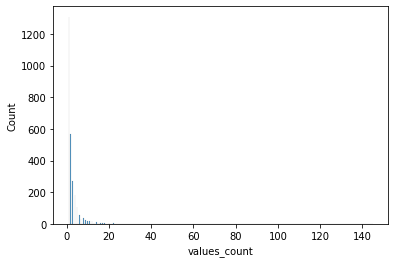

In [72]:
df_merchant_long_lat_values = df['merchant_long_lat'].value_counts()
df_merchant_long_lat_values = df_merchant_long_lat_values.reset_index()
df_merchant_long_lat_values.columns = ['merchant_long_lat', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merchant_long_lat_values, x='values_count')

In [73]:
df['merchant_long_lat'].value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
115.98 -32.21      1
152.89 -27.56      1
138.66 -34.88      1
152.91 -27.53      1
153.02 -27.39      1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [74]:
df['movement'].unique()

array(['debit', 'credit'], dtype=object)

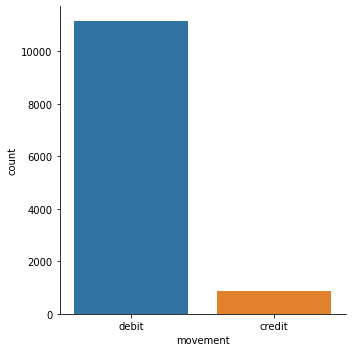

In [75]:
sns.catplot(data=df, x='movement', kind='count')

Things to calculate:

- Average transaction amount
- Average transaction count per customer
- Chart of transaction per day of week
- Insights from location information

In [76]:
df.groupby(['movement', 'txn_description'])['amount'].mean()

movement  txn_description
credit    PAY/SALARY         1898.728029
debit     INTER BANK           86.699461
          PAYMENT              77.613077
          PHONE BANK          106.099010
          POS                  40.407412
          SALES-POS            39.909789
Name: amount, dtype: float64

In [77]:
df.groupby(['movement', 'txn_description'])['amount'].median()

movement  txn_description
credit    PAY/SALARY         1626.480
debit     INTER BANK           39.000
          PAYMENT              42.500
          PHONE BANK           43.000
          POS                  19.430
          SALES-POS            20.035
Name: amount, dtype: float64

In [78]:
df_average_count = df.groupby(['account', 'movement'])['amount'].count().reset_index()
df_average_count.head(4)

,account,movement,amount
0,ACC-1037050564,credit,13
1,ACC-1037050564,debit,246
2,ACC-1056639002,credit,6
3,ACC-1056639002,debit,80


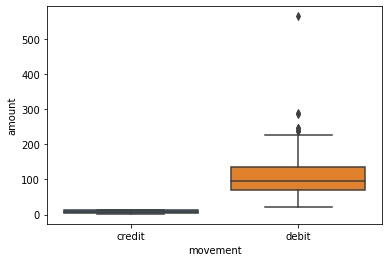

In [79]:
sns.boxplot(data=df_average_count, x='movement', y='amount')

In [80]:
df_average_count.loc[df_average_count['movement']=='debit'].mean()

amount    111.6
dtype: float64

In [81]:
df_average_count.loc[df_average_count['movement']=='debit'].median()

amount    96.5
dtype: float64

In [82]:
df_average_count.loc[df_average_count['movement']=='debit'].min()

account     ACC-1037050564
movement             debit
amount                  22
dtype: object

In [83]:
df_average_count.loc[df_average_count['movement']=='debit'].max()

account     ACC-966140392
movement            debit
amount                564
dtype: object

In [84]:
df_average_count.loc[df_average_count['movement']=='credit'].mean()

amount    8.83
dtype: float64

In [85]:
df_average_count.loc[df_average_count['movement']=='credit'].median()

amount    7.0
dtype: float64

In [86]:
df_average_count.loc[df_average_count['movement']=='credit'].max()

account     ACC-966140392
movement           credit
amount                 14
dtype: object

In [87]:
df_average_count.loc[df_average_count['movement']=='credit'].min()

account     ACC-1037050564
movement            credit
amount                   2
dtype: object

In [88]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'extraction_date', 'extraction_month_name',
       'extraction_year', 'extraction_day_name', 'extraction_hour'],
      dtype='object')

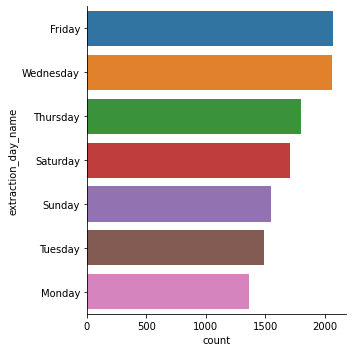

In [89]:
# df['extraction_day_name'].value_counts()
sns.catplot(data=df, y='extraction_day_name', kind='count', order=df['extraction_day_name'].value_counts().index)

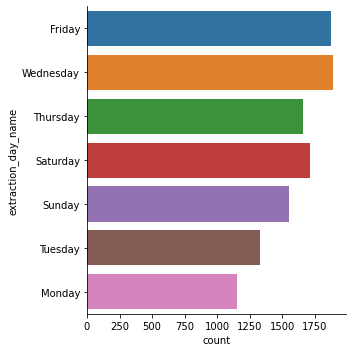

In [90]:
# df['extraction_day_name'].value_counts()
sns.catplot(data=df.loc[df['movement']=='debit'], y='extraction_day_name', kind='count', order=df['extraction_day_name'].value_counts().index)

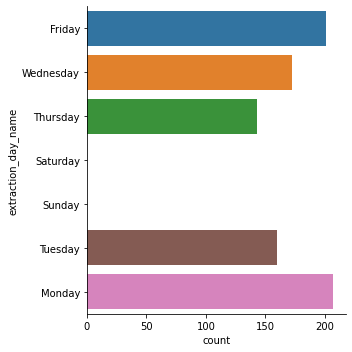

In [91]:
sns.catplot(data=df.loc[df['movement']=='credit'], y='extraction_day_name', kind='count', order=df['extraction_day_name'].value_counts().index)

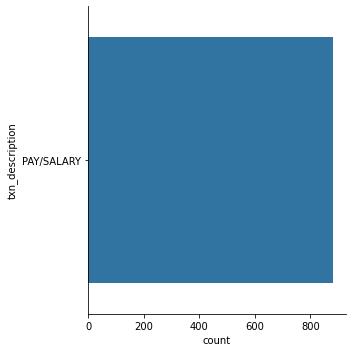

In [92]:
sns.catplot(data=df.loc[df['movement']=='credit'], y='txn_description', kind='count')

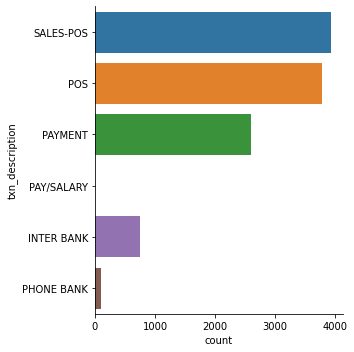

In [93]:
sns.catplot(data=df.loc[df['movement']=='debit'], y='txn_description', kind='count', order=df['txn_description'].value_counts().index)

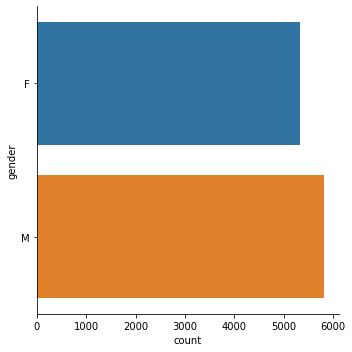

In [94]:
sns.catplot(data=df.loc[df['movement']=='debit'], y='gender', kind='count')

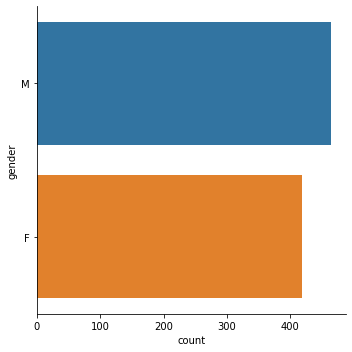

In [95]:
sns.catplot(data=df.loc[df['movement']=='credit'], y='gender', kind='count')

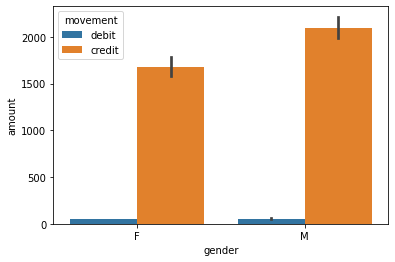

In [96]:
sns.barplot(data=df, y='amount', x='gender', hue='movement')

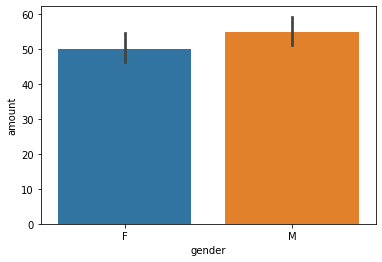

In [97]:
sns.barplot(data=df.loc[df['movement']=='debit'], y='amount', x='gender')

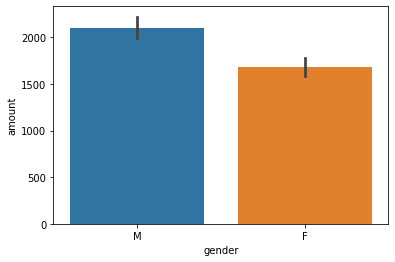

In [98]:
sns.barplot(data=df.loc[df['movement']=='credit'], y='amount', x='gender')

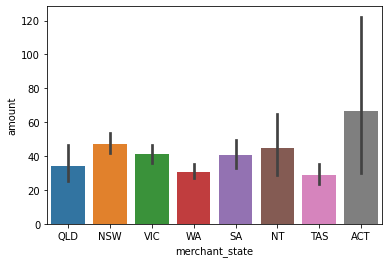

In [99]:
sns.barplot(data=df.loc[df['movement']=='debit'], y='amount', x='merchant_state')

In [100]:
df['extraction_date'].min()

datetime.date(2018, 8, 1)

In [101]:
df['extraction_date'].max()

datetime.date(2018, 10, 31)

In [102]:
df.loc[df['txn_description']=="PAY/SALARY"].sort_values(by=['account', 'extraction_date']).head(14)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour
705,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,1878.76,2018-08-06,F,40,NaN,NaN,2018-08-06 11:00:00+00:00,892.09,de558a6e22b6402b948dcf24066ac595,Australia,CUS-1614226872,NaN,credit,2018-08-06,August,2018,Monday,11
1602,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,2025.48,2018-08-13,F,40,NaN,NaN,2018-08-13 11:00:00+00:00,892.09,91082f097ab7414eae8ff699aa744ac7,Australia,CUS-1614226872,NaN,credit,2018-08-13,August,2018,Monday,11
2390,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,2628.62,2018-08-20,F,40,NaN,NaN,2018-08-20 11:00:00+00:00,892.09,ffa86370a9f0457faf40e8349e9bf3d9,Australia,CUS-1614226872,NaN,credit,2018-08-20,August,2018,Monday,11
3311,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,3060.28,2018-08-27,F,40,NaN,NaN,2018-08-27 11:00:00+00:00,892.09,a11ace33fe2b484e9e512ca45516aeb7,Australia,CUS-1614226872,NaN,credit,2018-08-27,August,2018,Monday,11
4252,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,3780.96,2018-09-03,F,40,NaN,NaN,2018-09-03 11:00:00+00:00,892.09,586a7325e8d54385bf732eae289f670b,Australia,CUS-1614226872,NaN,credit,2018-09-03,September,2018,Monday,11
5185,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,3724.18,2018-09-10,F,40,NaN,NaN,2018-09-10 11:00:00+00:00,892.09,1cbbcb140c64400fb52801626b1631f4,Australia,CUS-1614226872,NaN,credit,2018-09-10,September,2018,Monday,11
6112,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,4146.65,2018-09-17,F,40,NaN,NaN,2018-09-17 11:00:00+00:00,892.09,ff5cb6b8664b4ceaba1b8b3d49024635,Australia,CUS-1614226872,NaN,credit,2018-09-17,September,2018,Monday,11
7056,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,4465.56,2018-09-24,F,40,NaN,NaN,2018-09-24 11:00:00+00:00,892.09,73e282fb810d4273b5482aa4c3cc601a,Australia,CUS-1614226872,NaN,credit,2018-09-24,September,2018,Monday,11
7997,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,4494.64,2018-10-01,F,40,NaN,NaN,2018-10-01 11:00:00+00:00,892.09,71b91722ce8f4177a4be692ebb088fe6,Australia,CUS-1614226872,NaN,credit,2018-10-01,October,2018,Monday,11
8937,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,Rhonda,4545.77,2018-10-08,F,40,NaN,NaN,2018-10-08 11:00:00+00:00,892.09,cbd08944c11c413ea210dcca994274e9,Australia,CUS-1614226872,NaN,credit,2018-10-08,October,2018,Monday,11


In [103]:
df_sal = df.loc[df['txn_description']=='PAY/SALARY'].groupby(['account'])['amount'].sum().reset_index()
df_sal.head()

,account,amount
0,ACC-1037050564,11597.17
1,ACC-1056639002,19170.06
2,ACC-1199531521,26500.46
3,ACC-1217063613,9727.24
4,ACC-1222300524,13027.69


In [104]:
df_sal.dtypes

account     object
amount     float64
dtype: object

In [105]:
df_sal['annual_salary'] = df_sal['amount']*12/3
df_sal.head()

,account,amount,annual_salary
0,ACC-1037050564,11597.17,46388.68
1,ACC-1056639002,19170.06,76680.24
2,ACC-1199531521,26500.46,106001.84
3,ACC-1217063613,9727.24,38908.96
4,ACC-1222300524,13027.69,52110.76


In [106]:
# df_location = df.groupby(['account'])['merchant_state'].agg(pd.Series.mode).reset_index()

# .apply(lambda x: x.value_counts().head(3)

df_location = df.groupby(['account'])['merchant_state'].apply(lambda x:x.value_counts().head(1)).reset_index()
df_location = df_location.rename(columns={'level_1':'location'})
df_location.head(3)

,account,location,merchant_state
0,ACC-1037050564,QLD,185
1,ACC-1056639002,VIC,53
2,ACC-1199531521,WA,32


In [107]:
df_bal = df.groupby(['account'])['balance'].mean().reset_index()
df_bal = df_bal.rename(columns={'balance':'average_balance'})
df_bal.head(3)

,account,average_balance
0,ACC-1037050564,3331.424479
1,ACC-1056639002,46338.733837
2,ACC-1199531521,10162.788961


In [108]:
df_mod = df.merge(df_sal, how='inner', on='account')
df_mod = df_mod.merge(df_location, how='inner', on='account')
df_mod = df_mod.merge(df_bal, how='inner', on='account')
df_mod.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state_x,extraction,amount_x,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_hour,amount_y,annual_salary,location,merchant_state_y,average_balance
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08-01,August,2018,Wednesday,1,14191.38,56765.52,QLD,444,1735.120675
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,1,14191.38,56765.52,QLD,444,1735.120675
2,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,2018-08-01,August,2018,Wednesday,1,14191.38,56765.52,QLD,444,1735.120675


In [109]:
df_mod = df_mod.drop(df_mod.columns.difference(['account', 'gender', 'age', 'location', 'average_balance', 'annual_salary']), 1)
df_mod.shape

(12043, 6)

In [110]:
df_mod.dtypes

account             object
gender              object
age                  int64
annual_salary      float64
location            object
average_balance    float64
dtype: object

In [111]:
df_mod.drop_duplicates(subset=['account'], keep='first', inplace=True)

In [112]:
df_mod = df_mod.drop(columns=['account'])
df_mod.head(20)

,gender,age,annual_salary,location,average_balance
0,F,26,56765.52,QLD,1735.120675
578,M,38,52110.76,NSW,1191.291419
881,F,40,46388.68,QLD,3331.424479
1140,M,20,55687.20,NSW,5592.980078
1269,F,43,59810.24,VIC,5210.575373
1403,F,27,79524.20,WA,5854.977363
1695,M,40,118578.72,NSW,12071.625526
1809,M,19,73913.28,VIC,11885.744948
1906,M,23,109310.60,NSW,13368.370517
2022,M,43,134576.52,VIC,12471.784294


In [113]:
df_mod = df_mod.reset_index().drop(columns=['index'])

In [114]:
df_mod.head()

,gender,age,annual_salary,location,average_balance
0,F,26,56765.52,QLD,1735.120675
1,M,38,52110.76,NSW,1191.291419
2,F,40,46388.68,QLD,3331.424479
3,M,20,55687.20,NSW,5592.980078
4,F,43,59810.24,VIC,5210.575373


In [115]:
df_mod['location']

0     QLD
1     NSW
2     QLD
3     NSW
4     VIC
     ... 
95     SA
96    QLD
97    NSW
98    NSW
99     WA
Name: location, Length: 100, dtype: object

In [116]:
df_mod.dtypes

gender              object
age                  int64
annual_salary      float64
location            object
average_balance    float64
dtype: object

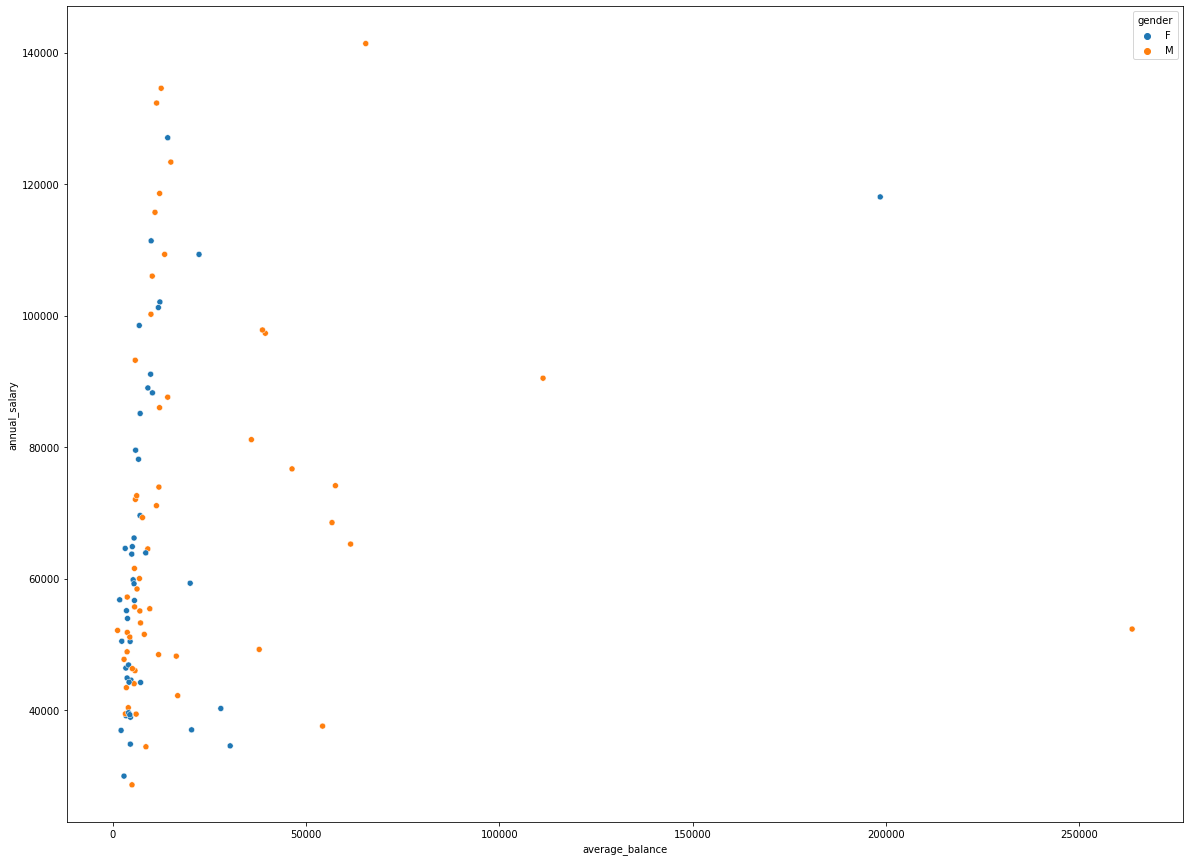

In [117]:
# plt.figure(figsize=(1,1))
plt.figure(figsize=(20,15))
# plt.figure(figsize(5,5))
sns.scatterplot(data=df_mod, x='average_balance', y='annual_salary', hue='gender')

In [118]:
df_mod['location'].unique()

array(['QLD', 'NSW', 'VIC', 'WA', 'SA', 'NT'], dtype=object)

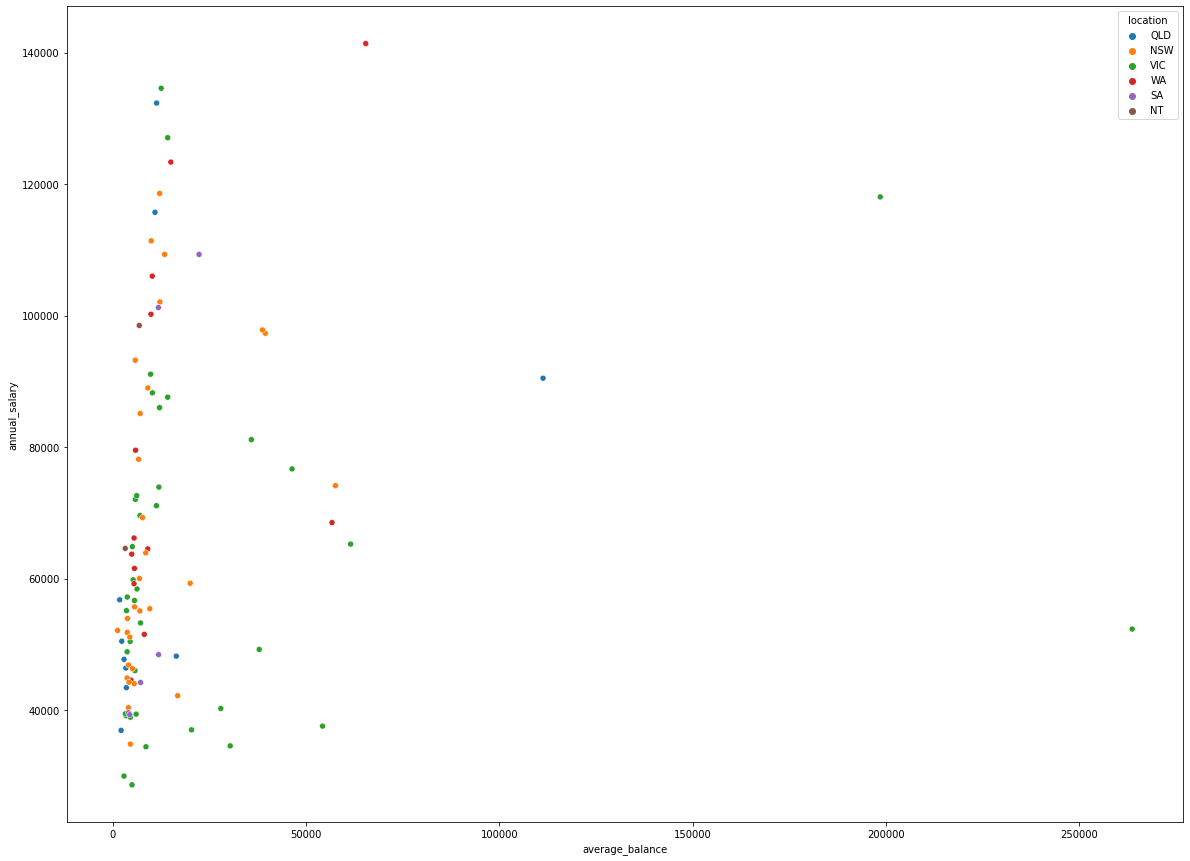

In [119]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_mod, x='average_balance', y='annual_salary', hue='location')

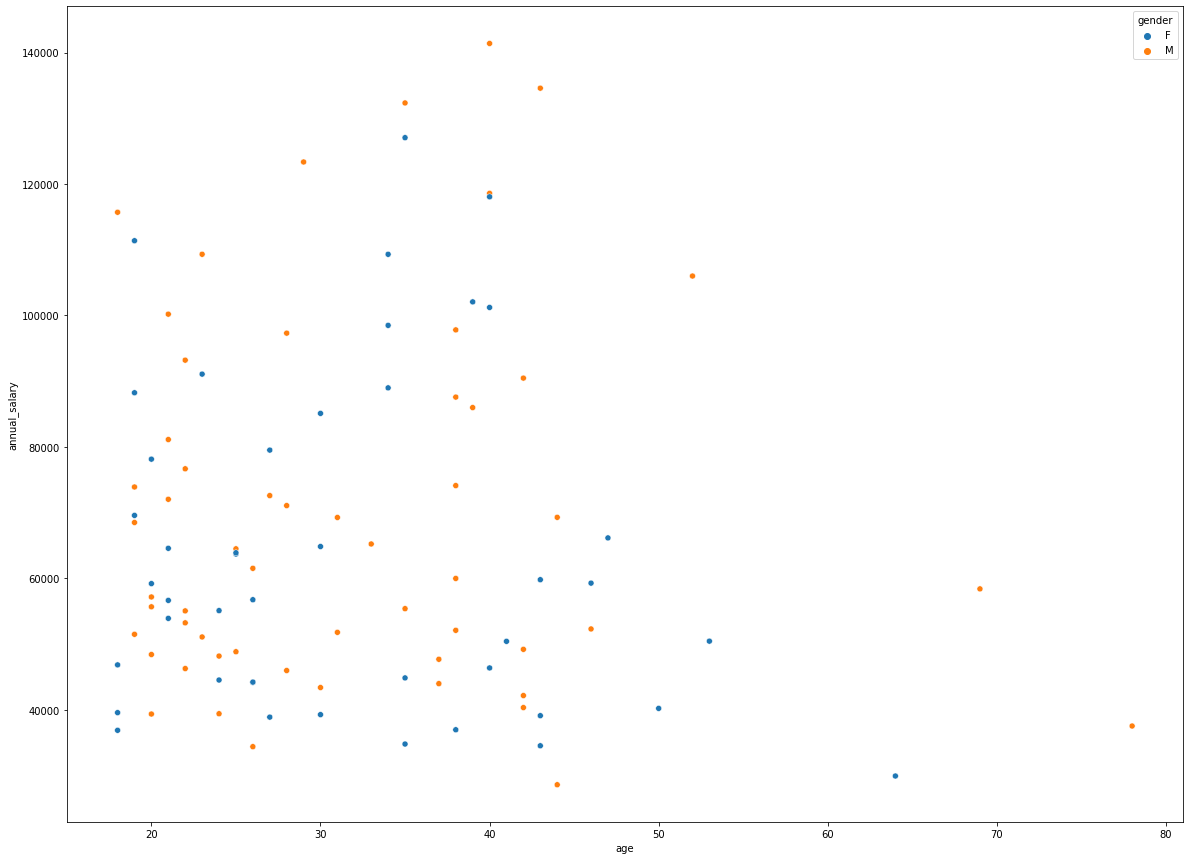

In [120]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_mod, x='age', y='annual_salary', hue='gender')

In [121]:
df_mod.corr()

,age,annual_salary,average_balance
age,1.000000,-0.036504,0.231963
annual_salary,-0.036504,1.000000,0.186986
average_balance,0.231963,0.186986,1.000000


In [122]:
X = df_mod[['average_balance']]

In [123]:
# X = pd.get_dummies(data=X, drop_first=True)
# X.head()

In [124]:
Y = df_mod['annual_salary']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [126]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 1)
(40, 1)
(60,)
(40,)


In [127]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
print(model.intercept_)

68441.21582362909


In [129]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coeff_parameter

,Coefficient
average_balance,0.036959


In [130]:
predictions = model.predict(X_test)
predictions

array([68620.82850949, 68485.24513655, 69898.44296   , 68602.2532554 ,
       68964.44471736, 68806.27969348, 69060.26307155, 68721.34123548,
       68887.37481476, 75780.04720367, 68662.71837876, 68580.06837546,
       68589.95626104, 68623.19807333, 70713.89392389, 68668.09620673,
       70153.8636103 , 68587.86134729, 68647.92852718, 68646.38717954,
       68651.85479534, 68626.1580293 , 68671.05512984, 68590.04544568,
       68564.34298502, 68642.88215006, 68699.88327941, 68613.70445124,
       68756.43553879, 68858.36504215, 68774.11117314, 68570.3208207 ,
       69264.38968307, 68518.75541153, 69046.82491031, 68701.09413354,
       68642.58252864, 68577.7243166 , 68608.01870457, 68704.64524509])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


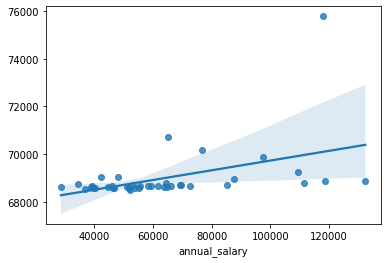

In [131]:
sns.regplot(y_test, predictions)

In [132]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:          annual_salary   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.1436
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.706
Time:                        16:29:26   Log-Likelihood:                -698.72
No. Observations:                  60   AIC:                             1401.
Df Residuals:                      58   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.844e+04   4090.505     

In [133]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [135]:
y_pred = regressor.predict(X_test)

dec_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dec_res

,Actual,Predicted
16,63717.16,46295.28
1,52110.76,56765.52
43,97314.48,97809.40
67,51100.92,39287.20
89,87588.24,127048.48
21,111368.88,100202.20
97,42187.44,123348.40
51,69296.16,69276.48
6,118578.72,85991.92
41,118049.12,52319.04


In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21795.204
Mean Squared Error: 956022142.3264799
Root Mean Squared Error: 30919.60773241601


In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 20694.42002738469
Mean Squared Error: 637275435.0071102
Root Mean Squared Error: 25244.31490468914


LINEAR REGRESSION

Mean Absolute Error: 20694.42002738469

Mean Squared Error: 637275435.0071102

Root Mean Squared Error: 25244.31490468914


DECISION TREES

Mean Absolute Error: 21795.204

Mean Squared Error: 956022142.3264799

Root Mean Squared Error: 30919.60773241601